In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
t = """1991 15 1.35
1993 18 1.63
1995 24 2.33
1997 22 2.41
1999 25 2.63
2001 29 2.93
2003 30 3.41
2005 32 3.26
2007 35 3.63
2009 38 4.15"""

In [3]:
x=[]
for i in t.split("\n"):
    nv = i.split(" ")[1]
    x.append(int(nv))
x=np.array(x)

In [4]:
y=[]
for i in t.split("\n"):
    ing = i.split(" ")[2]
    y.append(float(ing))
y=np.array(y)

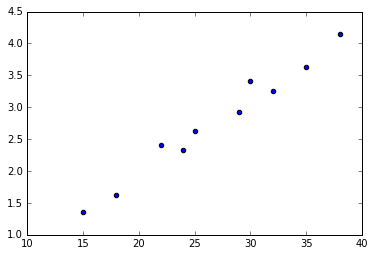

In [5]:
plt.scatter(x,y)
plt.show()

## Regresion

Vemos que podemos estimar que los puntos casi estan dispuestos segun una recta. La pregunta del millon es como encontrar esa recta


### Error

La recta que aproxime estos puntos debe minimizar el error. Denominamos yp la aproximacion de nuestra muestra: 

$$yp = u+vx$$

Se calcula el error 
$$Error = \frac{\sum_1^n{(y_i-yp_i)^2}}{n} = \frac{1}{n}\sum_{i=1}^n(y_i-u-vx_i)^2$$

### Metodo 1: Iteracion

Se coge un a y un b al azar, y se calcula el error. Despues se ve hacia donde va el error al modificar minimamente cada valor y se itera hasta llegar a un minimo.

In [6]:
# Cogemos u = 5 y v = 3
yp = 5 + 3*x 
yp

array([ 50,  59,  77,  71,  80,  92,  95, 101, 110, 119])

La  recta de regresión de la variable $Y$ sobre la $X$ asociada a la muestra
$\{(x_i,y_i)\; i=1,2, \cdot \cdot \cdot , n \},$ es la recta $$y=a+bx,$$
donde $a$ y $b$ son tales que el punto $(a,b)$ minimiza la función
$$f(u,v)=\frac{1}{n}\sum_{i=1}^n(y_i-u-vx_i)^2.$$


In [7]:
#Calculamos el error
ep =  np.mean((y-yp)**2)
ep

7230.4853299999986

In [8]:
# Pongamoslo en forma de funcion
def error(u,v):
    yp = u+x*v
    return np.mean((y-yp)**2)

In [9]:
#Verificamos que va
error(5,3)

7230.4853299999986

In [10]:
#Cual seria la desviacion del error si modificamos ligeramente los valores de u y v 
print error(5.1,3)
print error(5,3.1)

7247.02073
7709.02093


In [11]:
# Viendo la desviacion cogemos como nuevos valores:
u = 4.9
v = 2.9
error(u,v)

6751.3063299999994

In [12]:
# Iteramos esta maniobra 55000 de veces
delta = 0.0001
u = 4.9
v = 2.9
#Guardamos los valores intermedios de u y v para visualizerlos despues
ubuf=[u]
vbuf=[v]
errorbuf=[error(u,v)]
errorp = error(u,v)
for i in range(55000):
    if error(u+delta,v) < errorp:
        u+=delta
    else:
        u-=delta  
    if error(u,v+delta) < errorp:
        v+=delta
    else:
        v-=delta
    errorp = error(u,v)
    ubuf.append(u)
    vbuf.append(v)
    errorbuf.append(errorp)
    
print u
print v
print error(u,v)

-0.341400000002
0.116199999998
0.0182021040004


Esta manera de iterar se denomina gradient descent

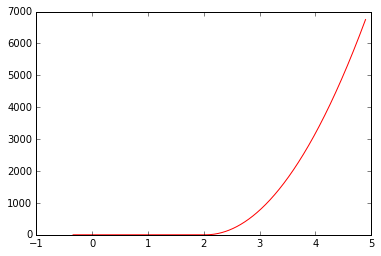

In [13]:
#Veamos la evolucion de u (Empieza a la derecha)
plt.plot(ubuf,errorbuf,color="red")

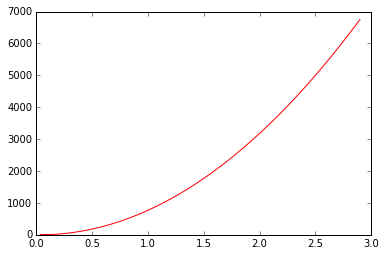

In [14]:
#Veamos la evolucion de v  (Empieza a la derecha)
plt.plot(vbuf,errorbuf,color="red")

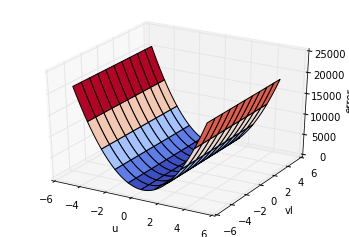

In [15]:
# Vamos a visualizar la funcion de coste

# Creamos una rejilla
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
shape = X.shape
X=X.reshape(-1)
Y=Y.reshape(-1)

ERROR=np.array([error(X[i],Y[i]) for i in range(len(X))])
X.reshape(shape)
Y.reshape(shape)
ERROR.reshape(shape)

X, Y = np.meshgrid(X, Y)

# Ploteamos en 3D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y,ERROR , cmap=cm.coolwarm)
ax.set_xlabel('u')
ax.set_ylabel('vl')
ax.set_zlabel('error')
plt.show()

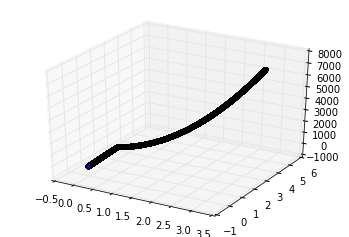

In [16]:
#Visualizamos el recorrido de los puntos durante la iteracion.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vbuf, ubuf, errorbuf)
plt.show()

### Metodo 2: Calculo directo de u y v

Al ser $$yp_i = ux_i+v$$ se pueden calcular determinar los valores de u y v matematicamente.

#### Covarianza

Es una medida de la manera en que dos variables X e Y varian conjuntamente. 

$$cov_{x,y} = \frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})$$

o tambien:


$$cov_{x,y} = \frac{1}{n}\sum_{i=1}^{n}x_iy_i - \bar{x}\bar{y}$$

Vamos a calcular la recta de regresión de la variable $Y$ sobre la $X$ asociada a la muestra
$\{(x_i,y_i)\; i=1,2, \cdot \cdot \cdot , n \}$.
$$f(u,v)=\frac{1}{n}\sum_{i=1}^n  \left(y_i^2-2y_iu-2y_ivx_i+u^2+2uvx_i+v^2x_i^2\right)$$ $$=\frac{1}{n}\sum_{i=1}^ny_i^2-2u\bar{y}-\frac{2v}{n}\sum_{i=1}^nx_iy_i
+u^2+2uv\bar{x}+\frac{v^2}{n}\sum_{i=1}^nx_i^2.$$
Calculamos los puntos críticos de la función $f(u,v)$, es decir la solución del sistema

$$\nabla f(u,v)= \left( \frac{\partial f}{\partial u}(u,v), \frac{\partial f}{\partial v}(u,v)\right)=(0,0).$$
$$\left\{ \begin{array}{ll}  \frac{\partial f}{\partial u}(u,v)=-2\bar{y}+2u+2v\bar{x}=0 \\
 \frac{\partial f}{\partial v}(u,v)=-\frac{2}{n}\sum_{i=1}^nx_iy_i+2u \bar{x}+\frac{2v}{n}\sum_{i=1}^nx_i^2=0 \end{array} \right.$$ $$  \Longleftrightarrow \; \left\{ \begin{array}{ll} u+v\bar{x}=\bar{y} \\ u\bar{x}+
 v\frac{1}{n}\sum_{i=1}^nx_i^2=\frac{1}{n}\sum_{i=1}^nx_iy_i \end{array} \right. .$$ 
 
 
 Haciendo algunos cálculos, se obtiene que la solución de este sistema  es $$u=\bar{y}-\frac{\textrm{cov}_{x,y}}{v_x}\bar{x}, \hspace{1cm} v=\frac{\textrm{cov}_{x,y}}{v_x}.$$ siendo $v_x$ la varianza de la muestra x.
 Se puede comprobar que el punto $(a,b)=\left(\bar{y}-\frac{\textrm{cov}_{x,y}}{v_x}\bar{x},\frac{\textrm{cov}_{x,y}}{v_x} \right)$, es el que minimiza a la función $f(u,v)$.

 Conclusión: recta de regresión de la variable $Y$ sobre la $X$ asociada a la muestra
$\{(x_i,y_i)\; i=1,2, \cdot \cdot \cdot , n \}$ es:
$$ \boxed{ y=\bar{y}-\frac{\textrm{cov}_{x,y}}{v_x}\bar{x}+\frac{\textrm{cov}_{x,y}}{v_x}x} $$

In [17]:
#Calculamos la covarianza
cov=np.mean((x-np.mean(x))*(y-np.mean(y)))
cov

5.7455999999999996

In [18]:
#Calculamos los coeficientes:
vx = np.var(x)
vx

48.559999999999995

In [19]:
u = np.mean(y)-np.mean(x)*cov/vx
v = cov/vx
print u
print v

-0.397965403624
0.118319604613


In [20]:
#Calculamos el error
error(u,v)

0.017983879736408592

In [21]:
#El paquete numpy permite calcular la covarianza pero debemos especificarlo CON bias
np.cov(x,y,bias=True)

array([[ 48.56    ,   5.7456  ],
       [  5.7456  ,   0.697801]])

In [22]:
cov=np.cov(x,y,bias=True)[0][1]
cov

5.7455999999999996

### Libreria de Python

In [23]:
# Se puede usar directamente scipy para calcular los coeficientes de la recta
from scipy import stats
stats.linregress(x,y)

(0.11831960461285007,
 -0.3979654036243816,
 0.98702977748932663,
 1.2189676233312769e-07,
 0.0068038912318461216)